# Objective:
Analyze Zomato delivery data to uncover key factors affecting delivery time, build a predictive model using PyCaret for accurate time estimation, and provide data-driven optimization strategies to enhance delivery efficiency.

In [2]:
#import libraries

import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

pd.set_option('display.max_columns',None)

In [3]:
#Load and read data

df=pd.read_csv('Zomato Dataset.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
#General overview of our dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

# Data Cleaning:

In [6]:
df=df.rename(columns={'Time_Orderd':'Time_Order_placed','Time_taken (min)':'Time_taken_mins'})
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Order_placed',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken_mins'],
      dtype='object')

In [7]:
#Check null values

df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Order_placed              1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken_mins                   0
dtype: int64

In [8]:
#Handling null values

df['Delivery_person_Age']= df['Delivery_person_Age'].fillna( round(df['Delivery_person_Age'].mean(),0))

df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna( round(df['Delivery_person_Ratings'].mean(),1))

df=df[(~df['Time_Order_placed'].isnull())]

df['Weather_conditions']= df['Weather_conditions'].fillna( df['Weather_conditions'].mode()[0])

df['Road_traffic_density']= df['Road_traffic_density'].fillna( df['Road_traffic_density'].mode()[0])

df['multiple_deliveries']=df['multiple_deliveries'].fillna( df['multiple_deliveries'].mode()[0])

df['Festival']=df['Festival'].fillna( df['Festival'].mode()[0])

df['City']=df['City'].fillna( df['City'].mode()[0])

df=df.reset_index()

In [9]:
#Check for duplicated values

df[df.duplicated()]

,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order_placed,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_mins


In [10]:
#provide correct datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43853 entries, 0 to 43852
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        43853 non-null  int64  
 1   ID                           43853 non-null  object 
 2   Delivery_person_ID           43853 non-null  object 
 3   Delivery_person_Age          43853 non-null  float64
 4   Delivery_person_Ratings      43853 non-null  float64
 5   Restaurant_latitude          43853 non-null  float64
 6   Restaurant_longitude         43853 non-null  float64
 7   Delivery_location_latitude   43853 non-null  float64
 8   Delivery_location_longitude  43853 non-null  float64
 9   Order_Date                   43853 non-null  object 
 10  Time_Order_placed            43853 non-null  object 
 11  Time_Order_picked            43853 non-null  object 
 12  Weather_conditions           43853 non-null  object 
 13  Road_traffic_den

In [11]:
df['Order_Date']= pd.to_datetime(df['Order_Date'],format='%d-%m-%Y')

In [12]:
#Changing datatype of 'Time_Order_picked'

#Invalid Time_Order_picked values

df[~(df['Time_Order_picked'].str.match(r'^\d{1,2}:\d{2}$'))][['Time_Order_picked']].head()

,Time_Order_picked
35,0.458333333
45,0.75
46,0.958333333
51,0.916666667
56,0.875


In [13]:
num_mask_Time_Order_picked=df['Time_Order_picked'].astype('str').str.replace('.','',1).str.isnumeric()

df.loc[num_mask_Time_Order_picked,'Time_Order_picked']= pd.to_timedelta(df.loc[num_mask_Time_Order_picked, 'Time_Order_picked'].astype(float), unit='d').apply(lambda x: (pd.Timestamp('00:00') + x).strftime('%H:%M'))

#For time starting with 24:00:00
df['Time_Order_picked']=df['Time_Order_picked'].apply(lambda x: '00:'+ x.split(':')[1] if x.startswith('24') else x)


df['Time_Order_picked']= pd.to_datetime(df['Time_Order_picked'],format='%H:%M').dt.time

In [14]:
#Changing datatype of 'Time_Order_picked'

#Invalid Time_Order_picked values
df[~(df['Time_Order_placed'].str.match(r'^\d{1,2}:\d{2}$'))][['Time_Order_placed']].head()

,Time_Order_placed
28,0.458333333
31,0.958333333
37,0.791666667
69,0.875
81,0.958333333


In [15]:
#Change datattype of 'Time_Order_placed'

num_mask_Time_Order_placed= df['Time_Order_placed'].str.replace('.','',1).str.isnumeric()

df.loc[num_mask_Time_Order_placed,'Time_Order_placed']=pd.to_timedelta(df.loc[num_mask_Time_Order_placed,'Time_Order_placed'].astype('float'),unit='d').apply(lambda x: (pd.Timestamp('00:00')+x).strftime('%H:%M'))

df['Time_Order_placed']=df['Time_Order_placed'].apply(lambda x: '00:'+ x.split(':')[1] if x.startswith('24') else x)

df['Time_Order_placed'] =pd.to_datetime(df['Time_Order_placed'],format='%H:%M').dt.time

In [16]:
df=df.drop(columns=['index','ID'])

# Feature Engineering: 

In [18]:
from geopy.distance import geodesic

def calculate_distance(row):
    return geodesic(
        (row['Restaurant_latitude'], row['Restaurant_longitude']),
        (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    ).km

df['Distance_km'] = df.apply(calculate_distance, axis=1)

# Delivery Speed
df['Delivery_Speed'] = df['Distance_km'] / (df['Time_taken_mins'] / 60)

# Extract day of the week
df['Day_of_Week'] = df['Order_Date'].dt.day_name()


In [19]:
cat_cols=df.select_dtypes('object').columns
cat_cols_analysis=['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'Day_of_Week']
cat_cols_analysis

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City',
 'Day_of_Week']

In [20]:
for col in cat_cols_analysis:
    df[col]=df[col].str.strip()

# Exploratory Data Anlaysis: 

## Univariate Analysis

### Numerical columns

In [24]:
df['Vehicle_condition'].unique()

array([2, 1, 0], dtype=int64)

In [25]:
num_cols=df.select_dtypes(['int','float']).columns
num_cols=['Delivery_person_Age', 'Delivery_person_Ratings',
       'Vehicle_condition', 'multiple_deliveries', 'Time_taken_mins',
       'Distance_km', 'Delivery_Speed']
num_cols

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken_mins',
 'Distance_km',
 'Delivery_Speed']

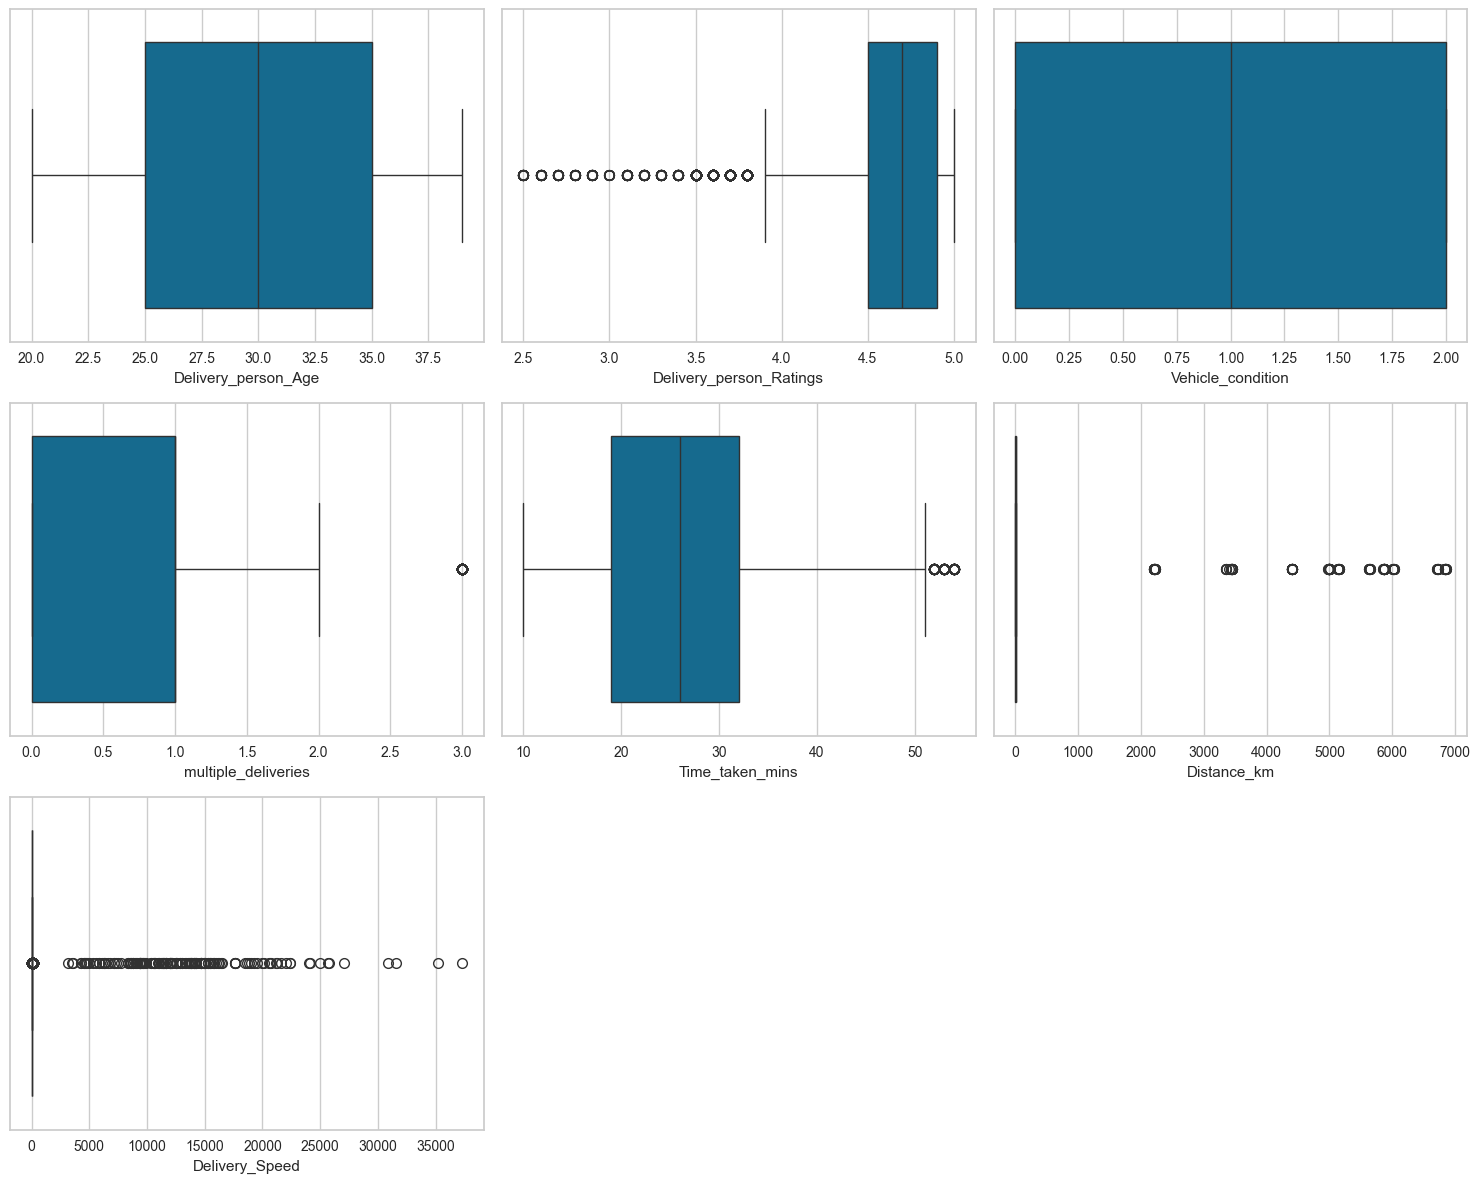

In [26]:
fig,ax=plt.subplots(3,3,figsize=(15,12))
ax=ax.flatten()
for i,col in enumerate(num_cols):
    sns.boxplot(x=col,data=df,ax=ax[i])
    
for j in range(len(num_cols), len(ax)):
    ax[j].set_visible(False)
    
plt.tight_layout()
plt.show()

**Outliers in Delievery person ratings, multiple_deliveries and time taken in mins are Valid. so, we wont remove them.**

**Outliers in Distance_km and Delivery_speed are clearly invalid.**

In [29]:
q1_Distance_km= df['Distance_km'].quantile(0.25)
q3_Distance_km= df['Distance_km'].quantile(0.75)
IQR_Distance_km=q3_Distance_km-q1_Distance_km

lower_Distance_km=q1_Distance_km-(1.5*IQR_Distance_km)
upper_Distance_km=q3_Distance_km+(1.5*IQR_Distance_km)

In [30]:
#Take copy of original df

df1=df.copy()

In [31]:
df=df[(df['Distance_km'] >= lower_Distance_km) & (df['Distance_km'] <= upper_Distance_km)].reset_index(drop=True)

In [32]:
q1_Delivery_Speed= df['Delivery_Speed'].quantile(0.25)
q3_Delivery_Speed= df['Delivery_Speed'].quantile(0.75)
IQR_Delivery_Speed=q3_Delivery_Speed-q1_Delivery_Speed

lower_Delivery_Speed=q1_Delivery_Speed-(1.5*IQR_Delivery_Speed)
upper_Delivery_Speed=q3_Delivery_Speed+(1.5*IQR_Delivery_Speed)

In [33]:
df=df[(df['Delivery_Speed'] >= lower_Delivery_Speed) & (df['Delivery_Speed'] <= upper_Delivery_Speed)].reset_index(drop=True)

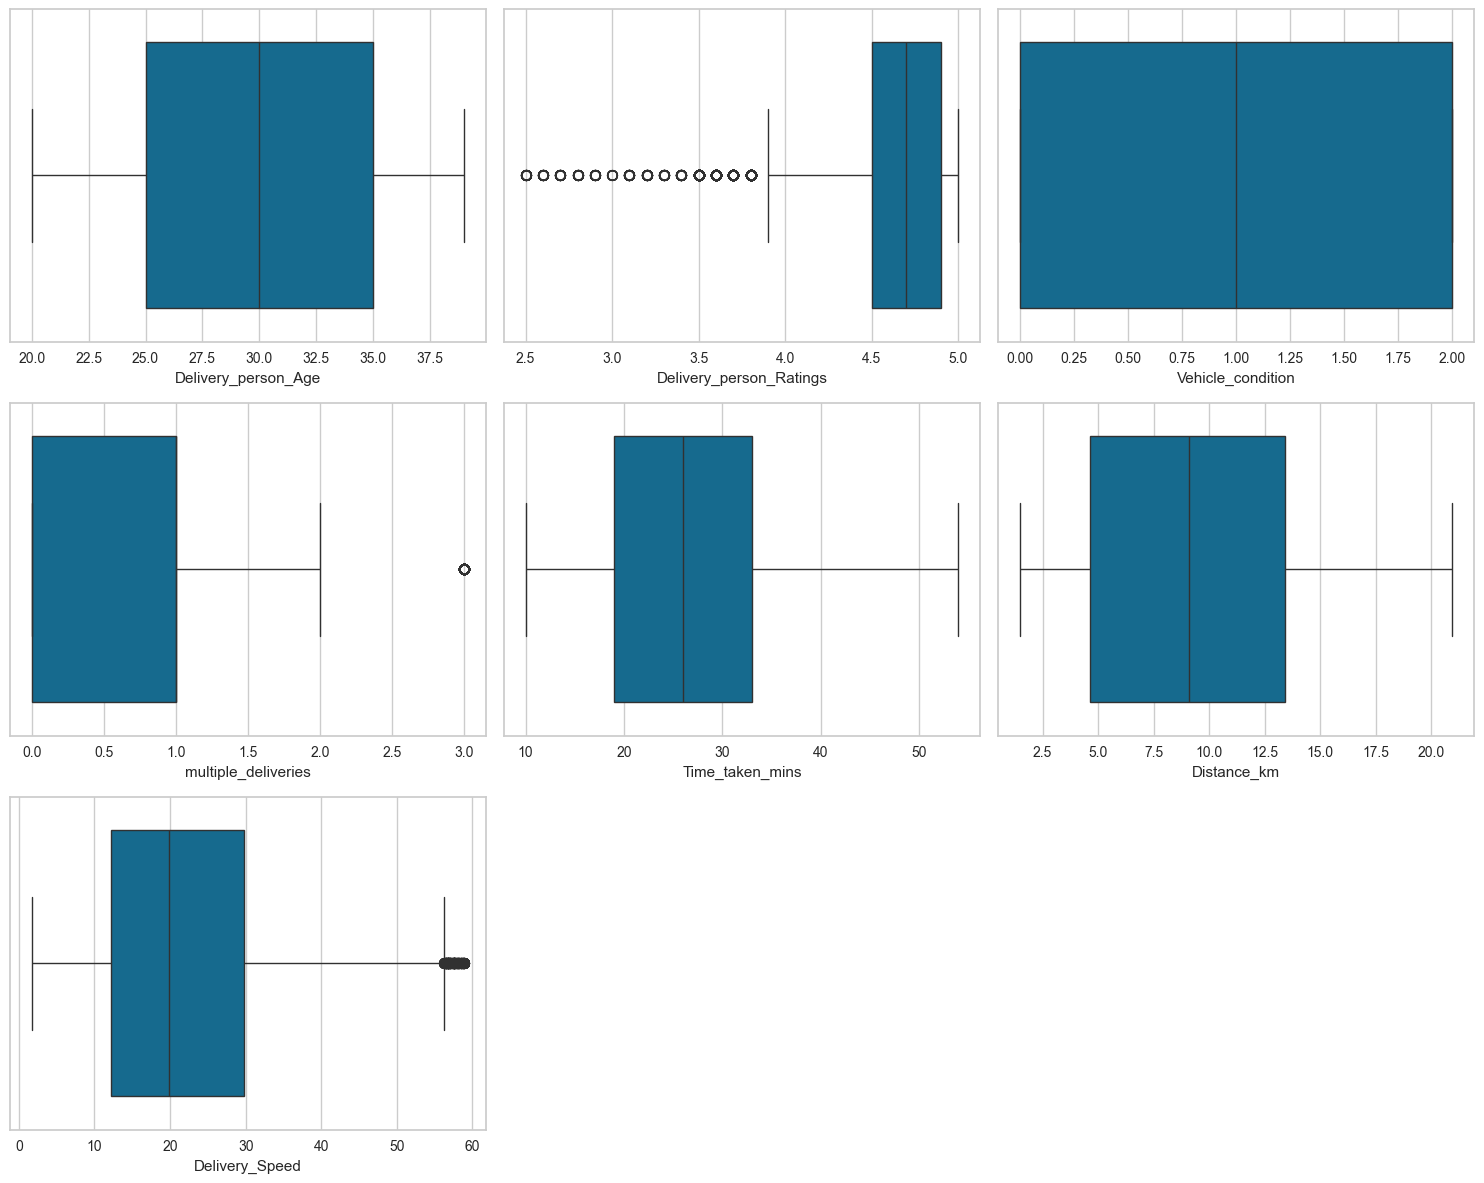

In [34]:
fig,ax=plt.subplots(3,3,figsize=(15,12))
ax=ax.flatten()
for i,col in enumerate(num_cols):
    sns.boxplot(x=col,data=df,ax=ax[i])
    
for j in range(len(num_cols), len(ax)):
    ax[j].set_visible(False)
    
plt.tight_layout()
plt.show()

In [35]:
df[num_cols].describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken_mins,Distance_km,Delivery_Speed
count,42174.000000,42174.000000,42174.000000,42174.000000,42174.000000,42174.000000,42174.000000
mean,29.672025,4.631003,0.988334,0.758026,26.700455,9.417978,22.023812
std,5.749498,0.316513,0.819004,0.568285,9.279399,5.439974,12.694815
min,20.000000,2.500000,0.000000,0.000000,10.000000,1.463837,1.693853
25%,25.000000,4.500000,0.000000,0.000000,19.000000,4.648350,12.169067
50%,30.000000,4.700000,1.000000,1.000000,26.000000,9.107659,19.917927
75%,35.000000,4.900000,2.000000,1.000000,33.000000,13.391329,29.774005
max,39.000000,5.000000,2.000000,3.000000,54.000000,20.942906,58.928825


### *Insights:*


- The age group of most delivery persons is between 25 and 35.
- Most delivery persons have ratings between 4.5 and 5, with a few cases of low ratings as low as 2.5.
- Most orders are delivered in 20 to 35 minutes.
- The distance between the restaurant and the delivery location is typically between 5 and 14 km.
- Most delivery speeds range from 10 km/h to 30 km/h, with occasional speeds reaching up to 58 km/h.

### Categorical columns

In [39]:
cat_cols_analysis

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City',
 'Day_of_Week']

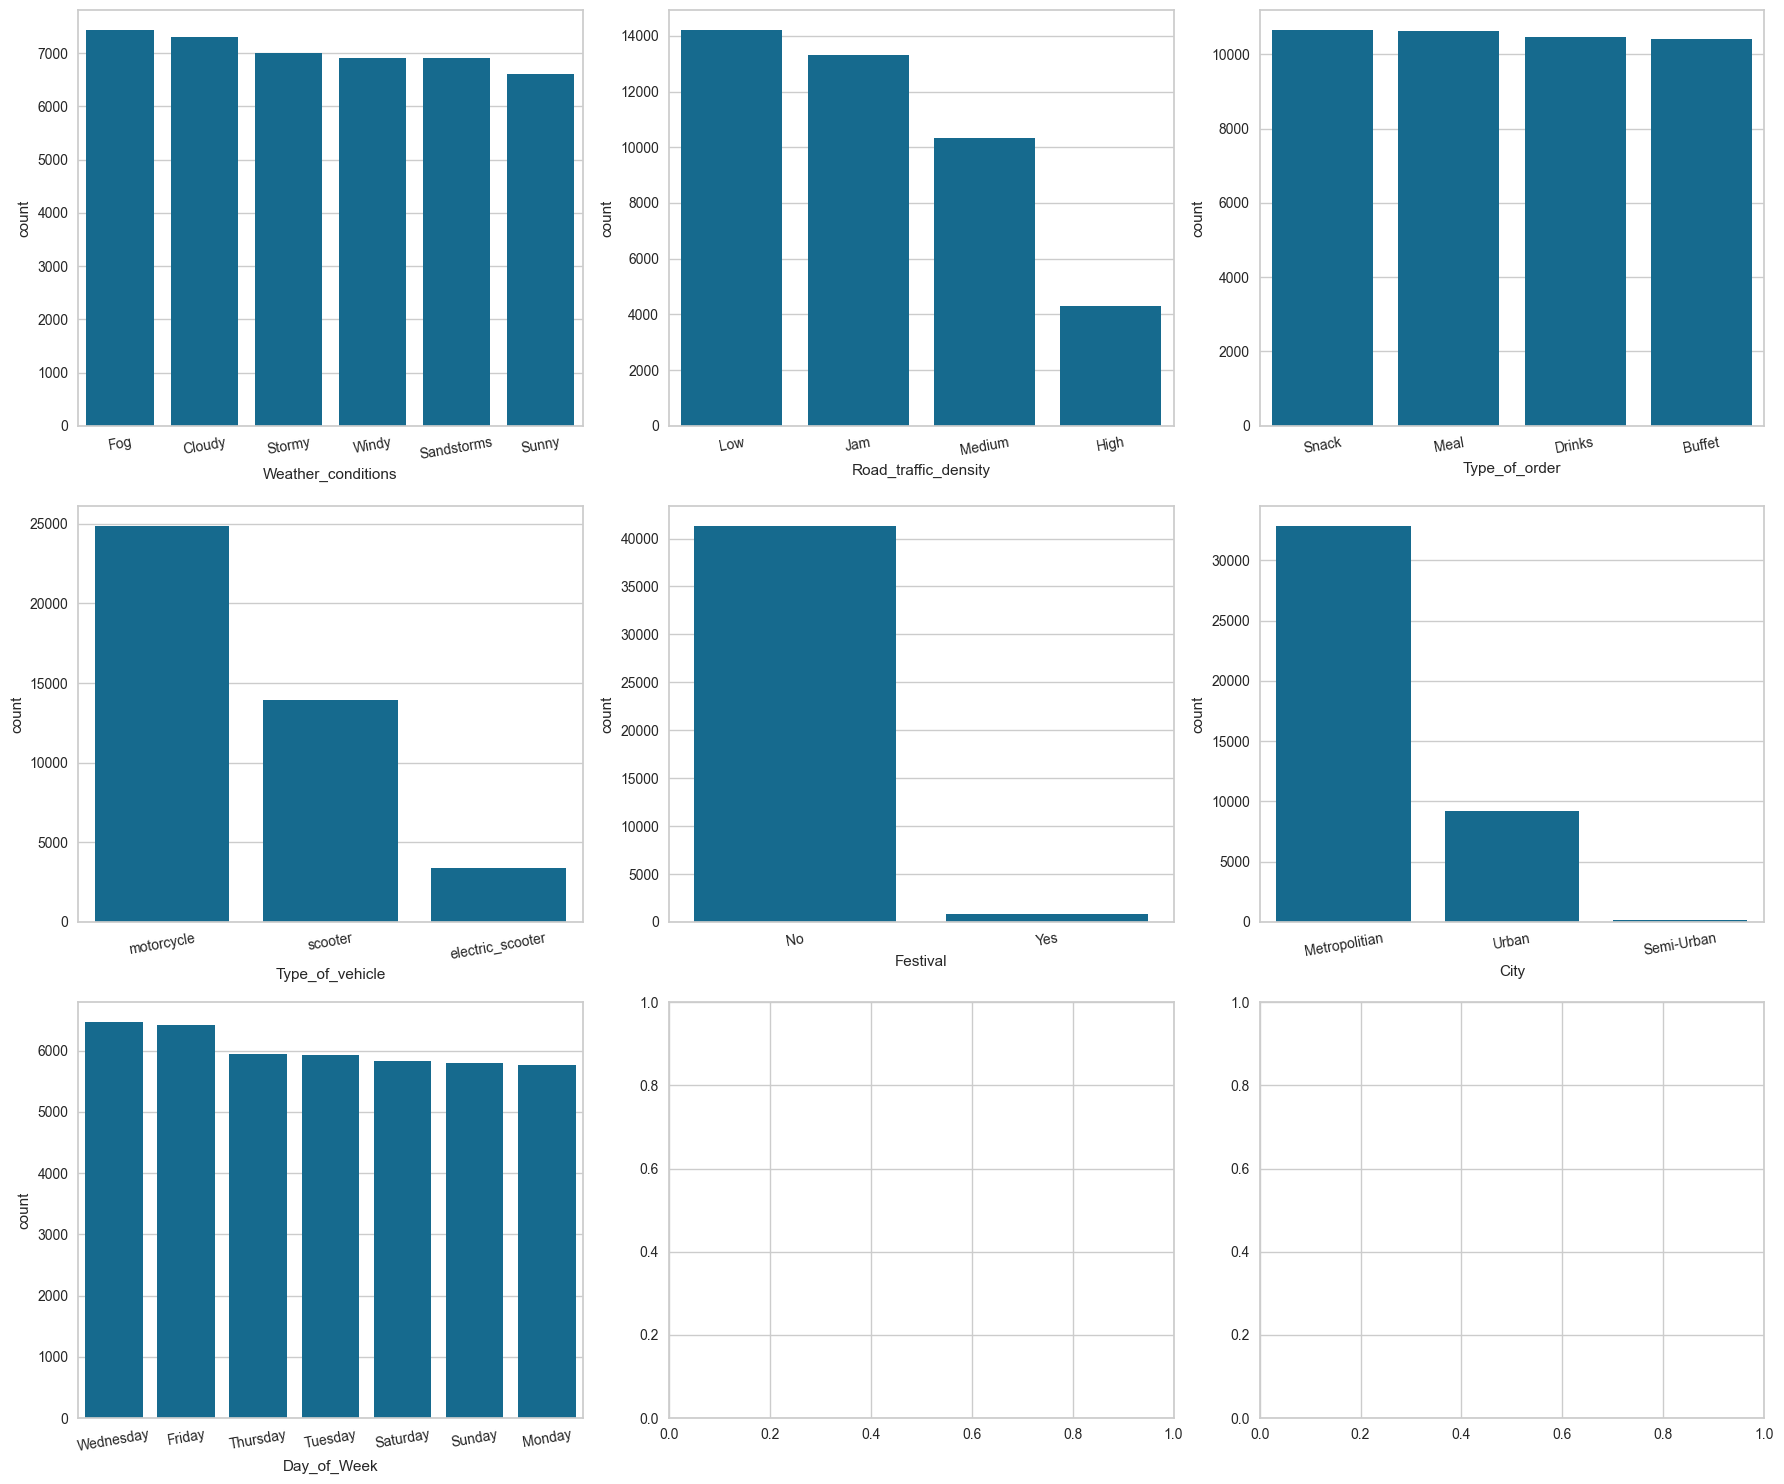

In [40]:
fig, ax = plt.subplots(3, 3, figsize=(18, 15))
ax = ax.flatten()

for i, col in enumerate(cat_cols_analysis):
    # Sort values in descending order by count
    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, ax=ax[i], order=order)
    ax[i].tick_params(axis='x',rotation=10)

for j in range(len(cat_cols), len(ax)):
    ax[j].set_visible(False)


plt.tight_layout()
plt.show()


### *Insights:*


- Motorcycles are the most commonly used vehicles for food delivery.  
- Most food orders come from metropolitan cities.  
- In a week, Wednesday and Friday receive the highest number of orders. 


## Bi-Variate Analysis

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42174 entries, 0 to 42173
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           42174 non-null  object        
 1   Delivery_person_Age          42174 non-null  float64       
 2   Delivery_person_Ratings      42174 non-null  float64       
 3   Restaurant_latitude          42174 non-null  float64       
 4   Restaurant_longitude         42174 non-null  float64       
 5   Delivery_location_latitude   42174 non-null  float64       
 6   Delivery_location_longitude  42174 non-null  float64       
 7   Order_Date                   42174 non-null  datetime64[ns]
 8   Time_Order_placed            42174 non-null  object        
 9   Time_Order_picked            42174 non-null  object        
 10  Weather_conditions           42174 non-null  object        
 11  Road_traffic_density         42174 non-nu

In [45]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Order_placed', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken_mins', 'Distance_km', 'Delivery_Speed',
       'Day_of_Week'],
      dtype='object')

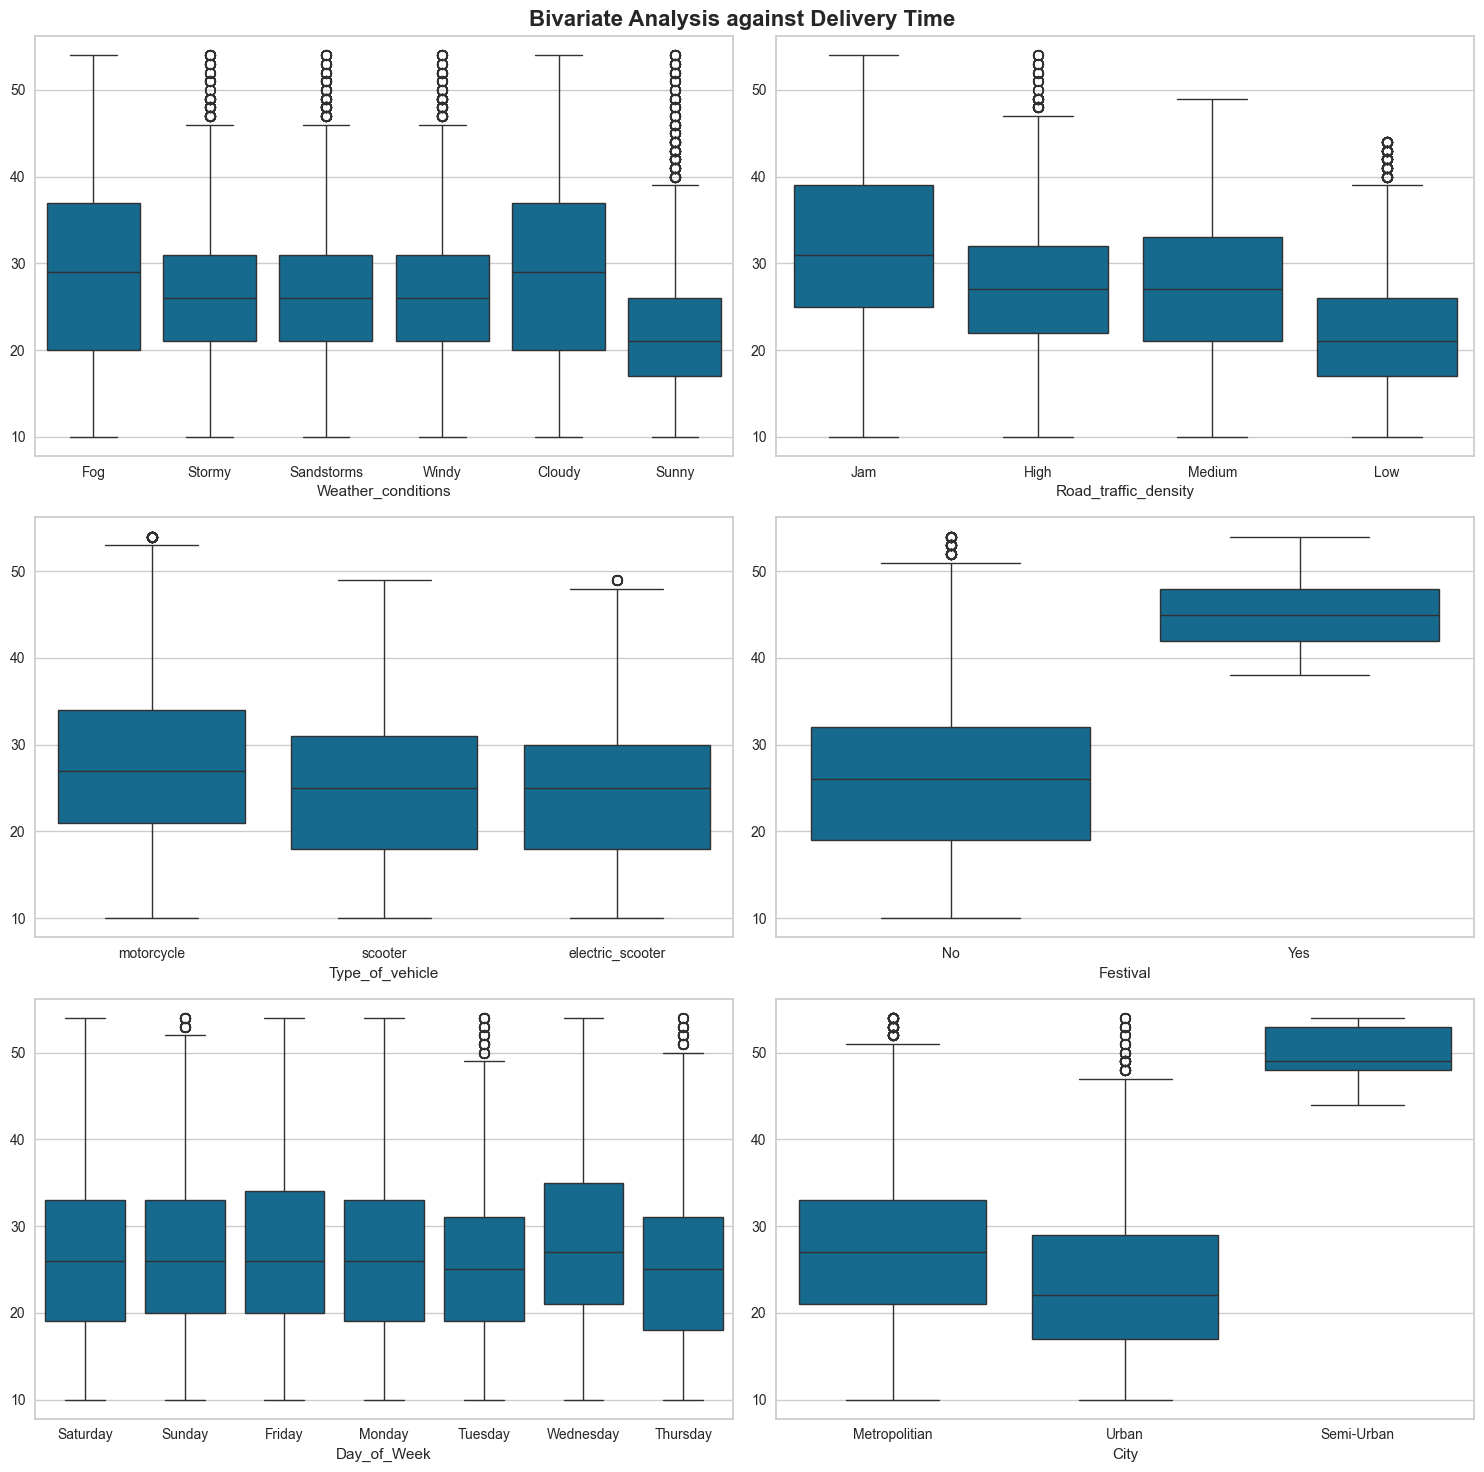

In [46]:
vars_for_bivariate_analysis=['Weather_conditions', 'Road_traffic_density','Type_of_vehicle','Festival','Day_of_Week','City']

fig,ax=plt.subplots(3,2,figsize=(15,15))
ax=ax.flatten()

for i,var in enumerate(vars_for_bivariate_analysis):
    sns.boxplot(x=var,y='Time_taken_mins', data=df,ax=ax[i])
    ax[i].set_ylabel('')

for j in range(len(vars_for_bivariate_analysis),len(ax)):
    ax[j].set_visible(False)

plt.suptitle('Bivariate Analysis against Delivery Time',fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [47]:
for var in vars_for_bivariate_analysis:
    print(f"Descriptive statistics for {var}:\n")
    print(df.groupby(var)['Time_taken_mins'].describe())
    print("\n" + "="*100 + "\n")


Descriptive statistics for Weather_conditions:

                     count       mean        std   min   25%   50%   75%   max
Weather_conditions                                                            
Cloudy              7303.0  28.951664  10.091718  10.0  20.0  29.0  37.0  54.0
Fog                 7441.0  28.952560  10.142442  10.0  20.0  29.0  37.0  54.0
Sandstorms          6908.0  26.434424   8.424778  10.0  21.0  26.0  31.0  54.0
Stormy              7010.0  26.401997   8.308068  10.0  21.0  26.0  31.0  54.0
Sunny               6602.0  22.368222   8.294440  10.0  17.0  21.0  26.0  54.0
Windy               6910.0  26.603907   8.459253  10.0  21.0  26.0  31.0  54.0


Descriptive statistics for Road_traffic_density:

                        count       mean       std   min   25%   50%   75%  \
Road_traffic_density                                                         
High                   4303.0  27.202882  8.363987  10.0  22.0  27.0  32.0   
Jam                   13325.0  31.

## *Insights:*

- **Weather Conditions:** Delivery time is **fastest in sunny weather** (22 mins) and **slowest in cloudy and foggy conditions** (29 mins).
- **Road Traffic Density:** Delivery is **quickest with low traffic** and **slowest during jams** (~31.7 mins).
- **Type of Vehicle:** **Electric scooters and scooters** are the **fastest** delivery modes, while **motorcycles** take longer.
- **Festival:** Delivery time is **almost double during festivals** (**45.5 mins**) compared to non-festival times (**26.3 mins**).
- **Day of the Week:** **Wednesday and Friday** have the **longest delivery times**, while the rest of the week is consistent (~26 mins).
- **City Type:** Delivery time is **quickest in urban areas** (**23.5 mins**) and **slowest in semi-urban areas** (**49.7 mins**).


## Geo-Spatial Analysis

In [51]:
import folium
from folium.plugins import HeatMap

#create a map with delivery locations
m=folium.Map(location=[df['Delivery_location_latitude'].mean(),df['Delivery_location_longitude'].mean()],zoom_start=12)

#Add Heatmap
heat_data=df[['Delivery_location_latitude','Delivery_location_longitude']].values.tolist()
HeatMap(heat_data).add_to(m)

#save map to HTML
m.save('delivery_heatmap.html')

## Correlation Analysis

In [53]:
df.corr(numeric_only=True)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken_mins,Distance_km,Delivery_Speed
Delivery_person_Age,1.000000,-0.112519,0.002788,0.000739,0.002919,0.000785,0.006051,0.108350,0.289962,0.026958,-0.159814
Delivery_person_Ratings,-0.112519,1.000000,-0.013611,-0.013480,-0.014260,-0.013705,0.044268,-0.121680,-0.355971,-0.133547,0.089864
Restaurant_latitude,0.002788,-0.013611,1.000000,0.691203,0.999988,0.691253,-0.002088,0.008326,0.015352,0.005725,-0.004631
Restaurant_longitude,0.000739,-0.013480,0.691203,1.000000,0.691108,0.999999,-0.004530,0.004171,0.008598,-0.008125,-0.012500
Delivery_location_latitude,0.002919,-0.014260,0.999988,0.691108,1.000000,0.691166,-0.002156,0.009074,0.017351,0.010589,-0.000900
Delivery_location_longitude,0.000785,-0.013705,0.691253,0.999999,0.691166,1.000000,-0.004554,0.004430,0.009291,-0.006439,-0.011208
Vehicle_condition,0.006051,0.044268,-0.002088,-0.004530,-0.002156,-0.004554,1.000000,-0.095527,-0.233374,-0.014038,0.118682
multiple_deliveries,0.108350,-0.121680,0.008326,0.004171,0.009074,0.004430,-0.095527,1.000000,0.375724,0.153773,-0.070667
Time_taken_mins,0.289962,-0.355971,0.015352,0.008598,0.017351,0.009291,-0.233374,0.375724,1.000000,0.411239,-0.194971
Distance_km,0.026958,-0.133547,0.005725,-0.008125,0.010589,-0.006439,-0.014038,0.153773,0.411239,1.000000,0.767144


In [54]:
df_encoded=df.copy()

In [55]:
df_encoded.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order_placed,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_mins,Distance_km,Delivery_Speed,Day_of_Week
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,13.397562,Saturday
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55:00,15:05:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,16.250546,Sunday
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30:00,17:40:00,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,39.326588,Friday
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20:00,09:30:00,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795,8.783384,Sunday
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50:00,20:05:00,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,28.351440,Monday


In [56]:
df_encoded['Road_traffic_density'].unique()

array(['Jam', 'High', 'Medium', 'Low'], dtype=object)

In [57]:
#Encoding ordinal column using labelencoder

from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder(categories=[['Low','Medium','High','Jam']])

df_encoded['Road_traffic_density']= oe.fit_transform(df_encoded[['Road_traffic_density']])

In [58]:
dict(zip(oe.categories_[0], range(len(oe.categories_[0]))))

{'Low': 0, 'Medium': 1, 'High': 2, 'Jam': 3}

In [59]:
df_encoded.corr(numeric_only=True)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,Time_taken_mins,Distance_km,Delivery_Speed
Delivery_person_Age,1.000000,-0.112519,0.002788,0.000739,0.002919,0.000785,-0.002014,0.006051,0.108350,0.289962,0.026958,-0.159814
Delivery_person_Ratings,-0.112519,1.000000,-0.013611,-0.013480,-0.014260,-0.013705,-0.067440,0.044268,-0.121680,-0.355971,-0.133547,0.089864
Restaurant_latitude,0.002788,-0.013611,1.000000,0.691203,0.999988,0.691253,0.011720,-0.002088,0.008326,0.015352,0.005725,-0.004631
Restaurant_longitude,0.000739,-0.013480,0.691203,1.000000,0.691108,0.999999,0.008621,-0.004530,0.004171,0.008598,-0.008125,-0.012500
Delivery_location_latitude,0.002919,-0.014260,0.999988,0.691108,1.000000,0.691166,0.012882,-0.002156,0.009074,0.017351,0.010589,-0.000900
Delivery_location_longitude,0.000785,-0.013705,0.691253,0.999999,0.691166,1.000000,0.009024,-0.004554,0.004430,0.009291,-0.006439,-0.011208
Road_traffic_density,-0.002014,-0.067440,0.011720,0.008621,0.012882,0.009024,1.000000,0.014443,0.158310,0.423855,0.238965,0.021374
Vehicle_condition,0.006051,0.044268,-0.002088,-0.004530,-0.002156,-0.004554,0.014443,1.000000,-0.095527,-0.233374,-0.014038,0.118682
multiple_deliveries,0.108350,-0.121680,0.008326,0.004171,0.009074,0.004430,0.158310,-0.095527,1.000000,0.375724,0.153773,-0.070667
Time_taken_mins,0.289962,-0.355971,0.015352,0.008598,0.017351,0.009291,0.423855,-0.233374,0.375724,1.000000,0.411239,-0.194971


## *Correlation Insights:*

1. **Restaurant & Delivery Location Coordinates**:  
   - High positive correlation (~1), indicating that restaurants and delivery locations are close to each other geographically.

2. **Time Taken & Distance**:  
   - Moderate positive correlation (0.41), meaning longer distances take more time.  
   - **Delivery Speed & Distance** has a strong positive correlation (0.77), suggesting faster speeds for longer distances.

3. **Time Taken & Road Traffic**:  
   - Moderate positive correlation (0.42), implying higher road traffic increases delivery time.

4. **Delivery Person Ratings**:  
   - Negative correlation with **Time Taken** (-0.36), indicating that longer deliveries may lower ratings.

5. **Multiple Deliveries**:  
   - Correlated with **Time Taken** (0.38) and **Distance** (0.15), suggesting more deliveries take more time and slightly longer distances.

6. **Vehicle Condition**:  
   - Weak correlations with **Time Taken** (-0.23) and **Delivery Speed** (0.12), implying that vehicle condition may slightly affect delivery efficiency.

---

### Key Insights:
- Focus on optimizing routes to reduce time.
- Address road traffic to improve delivery speed.
- Improve vehicle condition for better performance.
- Efficiently manage multiple deliveries to minimize delays.


## Feature Engineering for Machine learning model

In [62]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42174 entries, 0 to 42173
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           42174 non-null  object        
 1   Delivery_person_Age          42174 non-null  float64       
 2   Delivery_person_Ratings      42174 non-null  float64       
 3   Restaurant_latitude          42174 non-null  float64       
 4   Restaurant_longitude         42174 non-null  float64       
 5   Delivery_location_latitude   42174 non-null  float64       
 6   Delivery_location_longitude  42174 non-null  float64       
 7   Order_Date                   42174 non-null  datetime64[ns]
 8   Time_Order_placed            42174 non-null  object        
 9   Time_Order_picked            42174 non-null  object        
 10  Weather_conditions           42174 non-null  object        
 11  Road_traffic_density         42174 non-nu

In [63]:
df_encoded['Time_Order_placed']= pd.to_datetime(df_encoded['Order_Date'].astype(str) + ' ' + df_encoded['Time_Order_placed'].astype(str))
df_encoded['Time_Order_picked']= pd.to_datetime(df_encoded['Order_Date'].astype(str) + ' ' + df_encoded['Time_Order_picked'].astype(str))

In [64]:
df_encoded['pickup_time_mins']=(df_encoded['Time_Order_picked']-df_encoded['Time_Order_placed']).dt.total_seconds()/60

In [65]:
df_encoded[ df_encoded['pickup_time_mins']<=0]['pickup_time_mins'].unique()

array([-1425., -1430., -1435.])

In [66]:
df_encoded[ df_encoded['pickup_time_mins']<=0][['Time_Order_placed','Time_Order_picked','pickup_time_mins']].head()

,Time_Order_placed,Time_Order_picked,pickup_time_mins
62,2022-03-05 23:50:00,2022-03-05 00:05:00,-1425.0
86,2022-03-26 23:55:00,2022-03-26 00:10:00,-1425.0
145,2022-04-04 23:50:00,2022-04-04 00:00:00,-1430.0
147,2022-03-04 23:45:00,2022-03-04 00:00:00,-1425.0
293,2022-03-18 23:55:00,2022-03-18 00:10:00,-1425.0


In [67]:
df_encoded['Time_Order_picked']= df_encoded.apply(lambda row: row['Time_Order_picked']+pd.Timedelta(days=1) if row['Time_Order_picked']<row['Time_Order_placed'] else row['Time_Order_picked'] ,axis=1)

In [68]:
df_encoded['pickup_time_mins']=(df_encoded['Time_Order_picked']-df_encoded['Time_Order_placed']).dt.total_seconds()/60

In [69]:
df_encoded['month']= df_encoded['Order_Date'].dt.month

In [70]:
df_encoded['weekend']= ['yes' if date.isoweekday() in list(range(1,6)) else 'no' for date in df_encoded['Order_Date']]

In [71]:
df_encoded['multiple_deliveries']= ['no' if num==0 else 'yes' for num in df_encoded['multiple_deliveries'] ]

In [72]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42174 entries, 0 to 42173
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           42174 non-null  object        
 1   Delivery_person_Age          42174 non-null  float64       
 2   Delivery_person_Ratings      42174 non-null  float64       
 3   Restaurant_latitude          42174 non-null  float64       
 4   Restaurant_longitude         42174 non-null  float64       
 5   Delivery_location_latitude   42174 non-null  float64       
 6   Delivery_location_longitude  42174 non-null  float64       
 7   Order_Date                   42174 non-null  datetime64[ns]
 8   Time_Order_placed            42174 non-null  datetime64[ns]
 9   Time_Order_picked            42174 non-null  datetime64[ns]
 10  Weather_conditions           42174 non-null  object        
 11  Road_traffic_density         42174 non-nu

In [73]:
unwanted_cols=['Delivery_person_ID','Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Order_placed','Time_Order_picked']

df_encoded_new= df_encoded.drop(columns=unwanted_cols)

In [74]:
df_encoded_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42174 entries, 0 to 42173
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather_conditions    42174 non-null  object 
 1   Road_traffic_density  42174 non-null  float64
 2   Vehicle_condition     42174 non-null  int64  
 3   Type_of_order         42174 non-null  object 
 4   Type_of_vehicle       42174 non-null  object 
 5   multiple_deliveries   42174 non-null  object 
 6   Festival              42174 non-null  object 
 7   City                  42174 non-null  object 
 8   Time_taken_mins       42174 non-null  int64  
 9   Distance_km           42174 non-null  float64
 10  Delivery_Speed        42174 non-null  float64
 11  Day_of_Week           42174 non-null  object 
 12  pickup_time_mins      42174 non-null  float64
 13  month                 42174 non-null  int32  
 14  weekend               42174 non-null  object 
dtypes: float64(4), int3

In [75]:
df_encoded_new.select_dtypes('O').head()

,Weather_conditions,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Day_of_Week,weekend
0,Fog,Snack,motorcycle,yes,No,Metropolitian,Saturday,no
1,Stormy,Meal,motorcycle,yes,No,Metropolitian,Sunday,no
2,Sandstorms,Drinks,scooter,yes,No,Metropolitian,Friday,yes
3,Sandstorms,Buffet,motorcycle,no,No,Metropolitian,Sunday,no
4,Fog,Snack,scooter,yes,No,Metropolitian,Monday,yes


In [76]:
nominal_cols= list(df_encoded_new.select_dtypes('O').columns)
nominal_cols

['Weather_conditions',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Day_of_Week',
 'weekend']

In [77]:
for col in nominal_cols:
    dummies=pd.get_dummies(df_encoded_new[col],drop_first=True,dtype='int',prefix=col)
    df_encoded_new=pd.concat([df_encoded_new,dummies],axis=1)

In [78]:
df_encoded_new=df_encoded_new.drop(columns=nominal_cols)

In [79]:
df_encoded_new.columns

Index(['Road_traffic_density', 'Vehicle_condition', 'Time_taken_mins',
       'Distance_km', 'Delivery_Speed', 'pickup_time_mins', 'month',
       'Weather_conditions_Fog', 'Weather_conditions_Sandstorms',
       'Weather_conditions_Stormy', 'Weather_conditions_Sunny',
       'Weather_conditions_Windy', 'Type_of_order_Drinks',
       'Type_of_order_Meal', 'Type_of_order_Snack',
       'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter',
       'multiple_deliveries_yes', 'Festival_Yes', 'City_Semi-Urban',
       'City_Urban', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday', 'weekend_yes'],
      dtype='object')

In [80]:
#New order

df_encoded_new=df_encoded_new[['Road_traffic_density', 'Vehicle_condition',
        'month',
       'Weather_conditions_Fog', 'Weather_conditions_Sandstorms',
       'Weather_conditions_Stormy', 'Weather_conditions_Sunny',
       'Weather_conditions_Windy', 'Type_of_order_Drinks',
       'Type_of_order_Meal', 'Type_of_order_Snack',
       'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter',
       'multiple_deliveries_yes', 'Festival_Yes', 'City_Semi-Urban',
       'City_Urban', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday', 'weekend_yes','Distance_km', 'Delivery_Speed', 'pickup_time_mins','Time_taken_mins']]

In [81]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
cols_to_scale=['Distance_km', 'Delivery_Speed', 'pickup_time_mins']

df_encoded_new[cols_to_scale]=scaler.fit_transform(df_encoded_new[cols_to_scale])

In [82]:
df_encoded_new[['Distance_km', 'Delivery_Speed', 'pickup_time_mins']].head()

,Distance_km,Delivery_Speed,pickup_time_mins
0,0.156893,-0.679518,1.223984
1,-0.586150,-0.454779,0.003017
2,0.798971,1.362996,0.003017
3,-1.193068,-1.042992,0.003017
4,1.830087,0.498448,1.223984


In [83]:
cat_cols_df_encoded_new=['Vehicle_condition','month']
num_cols_df_encoded_new=['Road_traffic_density','Weather_conditions_Fog', 'Weather_conditions_Sandstorms',
       'Weather_conditions_Stormy', 'Weather_conditions_Sunny',
       'Weather_conditions_Windy', 'Type_of_order_Drinks',
       'Type_of_order_Meal', 'Type_of_order_Snack',
       'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter',
       'multiple_deliveries_yes', 'Festival_Yes', 'City_Semi-Urban',
       'City_Urban', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday', 'weekend_yes','Distance_km', 'Delivery_Speed', 'pickup_time_mins']

In [84]:
from sklearn.model_selection import train_test_split

#Independent features
X=df_encoded_new[['Road_traffic_density', 'Vehicle_condition', 'month',
       'Weather_conditions_Fog', 'Weather_conditions_Sandstorms',
       'Weather_conditions_Stormy', 'Weather_conditions_Sunny',
       'Weather_conditions_Windy', 'Type_of_order_Drinks',
       'Type_of_order_Meal', 'Type_of_order_Snack',
       'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter',
       'multiple_deliveries_yes', 'Festival_Yes', 'City_Semi-Urban',
       'City_Urban', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday', 'weekend_yes', 'Distance_km', 'Delivery_Speed',
       'pickup_time_mins']]

#Dependent features
y=df_encoded_new['Time_taken_mins']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

train_data=X_train.copy()
train_data['Time_taken_mins']=y_train

test_data=X_test.copy()
test_data['Time_taken_mins']=y_test

# Model Selection using Pycaret and Prediction

In [86]:
# initializing base regressor
base_reg = setup(train_data,
                 target='Time_taken_mins',
                 session_id=42,
                 experiment_name='base_regressor',
                 train_size=None,
                 numeric_features=num_cols_df_encoded_new,
                 categorical_features=cat_cols_df_encoded_new,
                 preprocess = False,                    
                 remove_outliers = False,
                 data_split_stratify=False,
                 fold_strategy = 'kfold',
                 fold = 3)

,Description,Value
0,Session id,42
1,Target,Time_taken_mins
2,Target type,Regression
3,Original data shape,"(33739, 28)"
4,Transformed data shape,"(33739, 28)"
5,Transformed train set shape,"(25304, 28)"
6,Transformed test set shape,"(8435, 28)"
7,Numeric features,25
8,Categorical features,2


In [87]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0854,0.0670,0.2587,0.9992,0.0085,0.0029,0.9867
dt,Decision Tree Regressor,0.0771,0.1446,0.3794,0.9983,0.0129,0.0025,0.0467
lightgbm,Light Gradient Boosting Machine,0.3190,0.2411,0.4907,0.9972,0.0171,0.0126,0.2900
et,Extra Trees Regressor,0.2486,0.2942,0.5423,0.9965,0.0200,0.0100,1.0100
gbr,Gradient Boosting Regressor,1.0886,2.1846,1.4776,0.9743,0.0569,0.0445,0.9200
lr,Linear Regression,2.8045,13.8639,3.7234,0.8370,0.2044,0.1241,0.8867
ridge,Ridge Regression,2.8047,13.8640,3.7234,0.8370,0.2043,0.1241,0.6600
lar,Least Angle Regression,2.8045,13.8639,3.7234,0.8370,0.2044,0.1241,0.0233
br,Bayesian Ridge,2.8047,13.8640,3.7234,0.8370,0.2043,0.1241,0.0233
huber,Huber Regressor,2.7622,14.0816,3.7525,0.8345,0.2133,0.1220,0.3233


The **Random Forest Regressor** is the best model to use with low error, achieving the lowest MAE (0.0854), MSE (0.0670), RMSE (0.2587), and a near-perfect R² (0.9992), making it highly accurate and efficient.


In [90]:
rf_model=create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0872,0.0679,0.2606,0.9992,0.0085,0.0029
1,0.0824,0.0624,0.2498,0.9993,0.0081,0.0028
2,0.0866,0.0706,0.2657,0.9992,0.0090,0.0030
Mean,0.0854,0.0670,0.2587,0.9992,0.0085,0.0029
Std,0.0022,0.0034,0.0066,0.0000,0.0004,0.0001


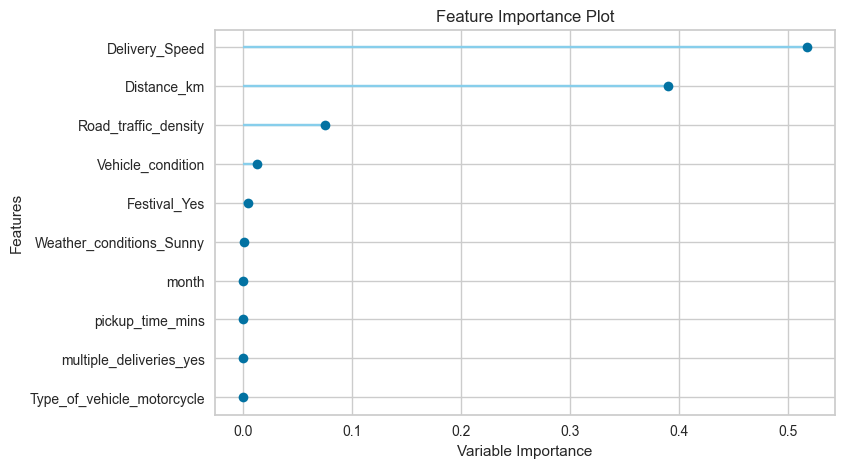

In [91]:
#Feature importance plot for the best model

plot_model(rf_model,'feature')



Based on this plot, it is very obvious that **the features that affect time_taken the most are (in that order):**

**1. Delivery Speed**

**2. Distance from the restuarant to the Delivery location**

**3. Road Traffic Density**

**4. Vehicle Condition**

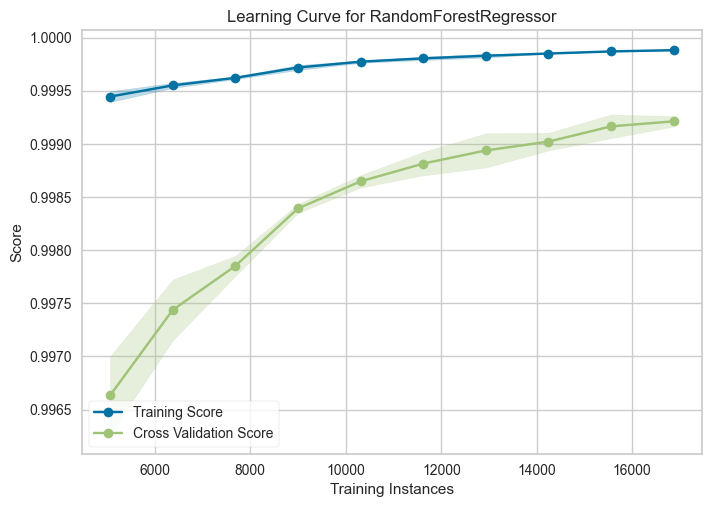

In [93]:
# learning curve plot
plot_model(rf_model,'learning')

In [94]:
# saving the model
save_model(rf_model, 'rf_reg_pipeline')
rf_regressor = load_model('rf_reg_pipeline')

# prediction
preds = predict_model(rf_regressor,data=test_data.iloc[:,:-1])

# view
#test['predictions'] = preds[['prediction_label']]
test_data['predictions'] = [int(np.floor(p)) for p in preds['prediction_label']]
test_data.head(10)

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Road_traffic_density,Vehicle_condition,month,Weather_conditions_Fog,Weather_conditions_Sandstorms,Weather_conditions_Stormy,Weather_conditions_Sunny,Weather_conditions_Windy,Type_of_order_Drinks,Type_of_order_Meal,...,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,weekend_yes,Distance_km,Delivery_Speed,pickup_time_mins,Time_taken_mins,predictions
25381,0.0,2,3,0,0,1,0,0,0,0,...,0,1,0,0,1,-0.897160,-0.910039,1.223984,26,26
21753,0.0,1,3,1,0,0,0,0,1,0,...,1,0,0,0,0,1.412770,0.872759,1.223984,31,30
14804,2.0,0,3,0,0,0,1,0,1,0,...,0,1,0,0,1,-1.452208,-1.578906,1.223984,46,46
7,3.0,2,3,0,1,0,0,0,0,0,...,0,0,0,1,1,1.360908,0.252703,0.003017,40,40
32131,3.0,1,3,0,1,0,0,0,0,1,...,0,0,1,0,1,1.337786,0.397791,0.003017,37,37
25454,1.0,2,3,0,0,0,1,0,0,1,...,0,1,0,0,1,-0.345960,0.360293,-1.217950,17,17
24433,3.0,2,3,0,0,0,1,0,0,0,...,1,0,0,0,0,-0.325398,0.273265,0.003017,18,18
314,2.0,2,4,0,0,0,0,0,0,0,...,0,0,1,0,1,-0.623221,-0.679726,-1.217950,27,26
30701,0.0,1,2,0,0,0,0,1,0,0,...,0,0,0,0,1,-1.457290,-1.231711,1.223984,14,14
16235,3.0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,1,-0.890899,-0.963208,-1.217950,28,28


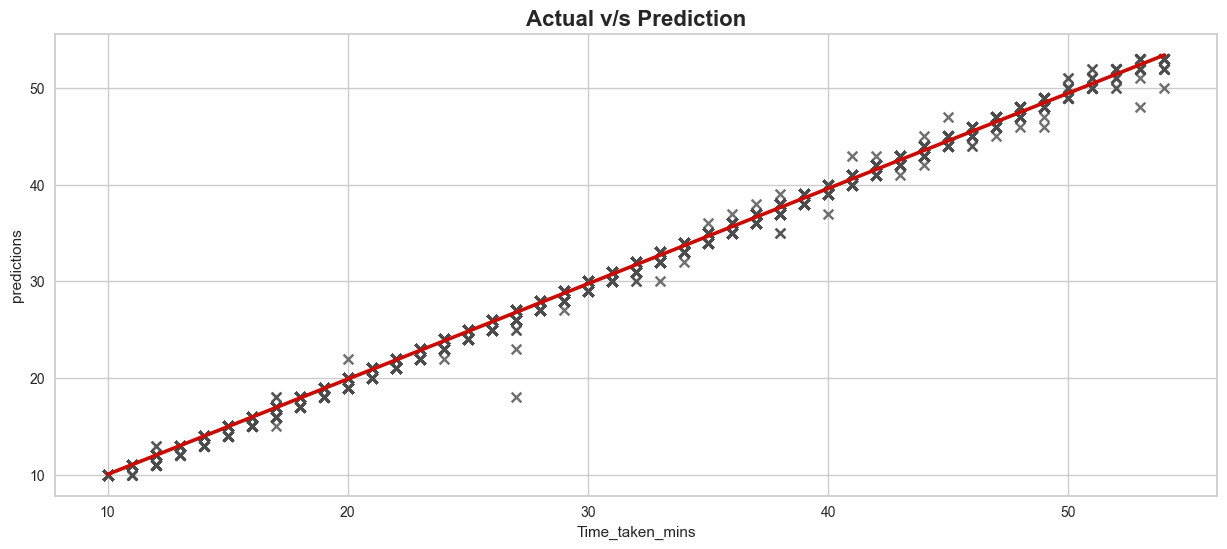

In [95]:
# regression plot for real vs prediced values
plt.figure(figsize=(15,6))
sns.regplot(x="Time_taken_mins", y= 'predictions'
            ,data=test_data
            ,ci=99
            ,marker="x"
            ,color=".3"
            ,line_kws=dict(color="r"))
plt.title('Actual v/s Prediction', fontweight='bold',fontsize=16)
plt.show()



As we can see in the above plot, **the predicted delivery time and the actual delivery time almost coincide with each other, with a very small gap.**

Hence, we can confirm that **Our model's predictions are Accurate.**


# Delivery Optimization

## Key Recommendations for Delivery Optimization

Based on the analysis, here are key recommendations to optimize the delivery process:

### 1. **Enhance Delivery Speed**:
- **Delivery Speed** is the biggest factor affecting **delivery time**. Electric scooters and scooters outperform motorcycles.
- **Action**: 
  - Switch to **electric scooters and scooters** for faster deliveries.
  - **Incentivize faster delivery** and ensure **regular vehicle maintenance**.

### 2. **Address Road Traffic**:
- **Traffic Density** directly impacts **delivery time**.
- **Action**:
  - Integrate **real-time traffic data** for dynamic route adjustments.
  - Schedule deliveries **outside rush hours** and forecast delays during **festivals**.

### 3. **Optimize Routes Based on Distance**:
- **Distance** and **delivery speed** correlate, but longer distances still take more time.
- **Action**: 
  - Use **route optimization algorithms** (e.g., Google Maps, OpenStreetMap).
  - **Group deliveries** in nearby areas to minimize time.

### 4. **Account for Festivals and Weather**:
- **Festivals** and **weather conditions** significantly slow down delivery.
- **Action**: 
  - Adjust schedules during **festivals**.
  - **Optimize routes for weather conditions** and consider **alternative delivery methods** in extreme weather.

### 5. **Monitor Delivery Ratings**:
- **Longer delivery times** may lower **ratings**.
- **Action**: 
  - Track delivery times for **low-rated personnel**.
  - Provide **training** for faster deliveries and **reward top performers**.

### 6. **Efficiently Manage Multiple Deliveries**:
- **Multiple deliveries** take more time and slightly longer distances.
- **Action**: 
  - Use **smart routing** to optimize multiple deliveries at once.

### 7. **City-Specific Optimization**:
- **Urban areas** have quicker delivery times than semi-urban areas.
- **Action**:
  - Use **faster vehicles and efficient routes** for urban areas.
  - Consider **alternative methods** (e.g., drones) in **semi-urban areas**.

---

### **Conclusion**

By implementing these strategies, food delivery companies can improve **delivery speed**, reduce **costs**, and enhance **customer satisfaction**. Leveraging **technology**, optimizing **traffic management**, and maintaining **quality control** will reduce delivery times, improve service quality, and boost efficiency.
